#**Predicting House Price**

#1. **Importing Libraries**

###1. numpy: A library for efficient numerical computation.
###2. pandas: A library for data manipulation and analysis.
###3. seaborn: A visualization library based on matplotlib.
###4. matplotlib.pyplot: A plotting library.
###5. MinMaxScaler: A scaler that scales features to a common range.
###6. train_test_split: A function to split data into training and testing sets.
###7. LinearRegression: A linear regression model.
###8. mean_squared_error: A function to calculate the mean squared error.
###9. r2_score: A function to calculate the R-squared score.
###10. mean_absolute_error: A function to calculate the mean absolute error.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#2. **Data Loading and Preprocessing**

###1. Loading Boston Housing Data: Loads the Boston housing dataset from a CSV file.

In [2]:
df = pd.read_csv('/content/boston.csv')

###2. Data Shape: Displays the shape of the loaded data.

In [3]:
df.shape

(506, 14)

###3. Data Information: Displays information about the data, including data types and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


###4. Data Head and Tail: Displays the first and last few rows of the data.

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


###5. Data Null Values: Checks for null values in the data.

In [7]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###6. Data Null Values Sum: Calculates the total number of null values in the data.

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

###7. Data Description: Displays summary statistics for the data.

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###8. Data Scaling: Scales the data using Min-Max Scaler.

In [12]:
scalar = MinMaxScaler()
scalar.fit(df)

MinMaxScaler()

In [13]:
DataScaled = scalar.fit_transform(df)
DataScaled = pd.DataFrame(DataScaled, columns=df.columns)

###9. Data Scaling Description: Displays summary statistics for the scaled data.

In [14]:
DataScaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
DataScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.0
ZN,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.0
INDUS,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.0
CHAS,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.0
NOX,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0
RM,506.0,0.521869,0.134627,0.0,0.445392,0.507281,0.586798,1.0
AGE,506.0,0.676364,0.289896,0.0,0.433831,0.768280,0.938980,1.0
DIS,506.0,0.242381,0.191482,0.0,0.088259,0.188949,0.369088,1.0
RAD,506.0,0.371713,0.378576,0.0,0.130435,0.173913,1.000000,1.0
TAX,506.0,0.422208,0.321636,0.0,0.175573,0.272901,0.914122,1.0


#3. **Data Visualization**

###1. Box Plot: Creates a box plot for the scaled data.

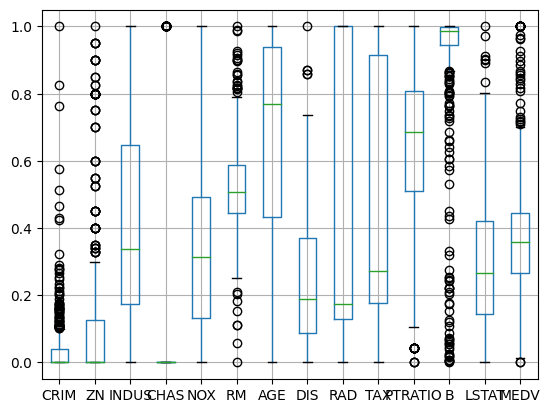

In [16]:
boxplot = DataScaled.boxplot()
plt.show()

###2. Correlation Matrix: Displays the correlation matrix for the data.

In [17]:
cordata = DataScaled.corr(method="pearson")
with pd.option_context("display.max_rows", None, "display.max_column", cordata.shape[1]):
  print(cordata)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

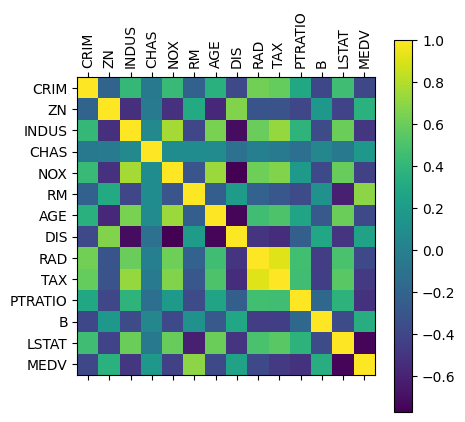

In [18]:
# Visualize correlations
cordata = DataScaled.corr(method="pearson")
plt.matshow(cordata)
plt.xticks(range(len(cordata.columns)), cordata.columns, rotation=90)
plt.yticks(range(len(cordata.columns)), cordata.columns)
plt.colorbar()
plt.show()

###3. Heatmap: Creates a heatmap for the correlation matrix.

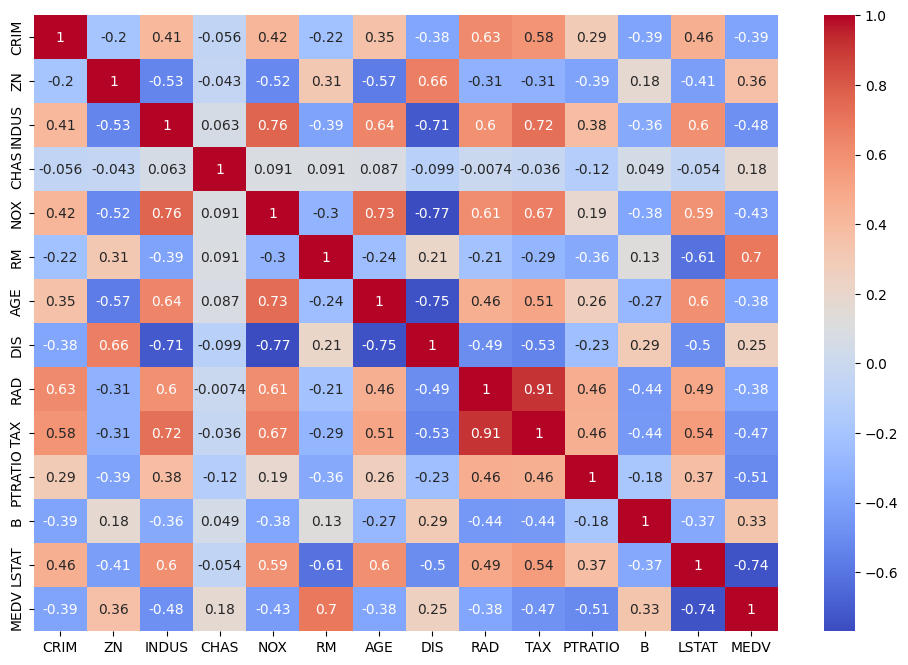

In [19]:
# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

###4. Distribution Plot: Creates a distribution plot for the median value of homes.

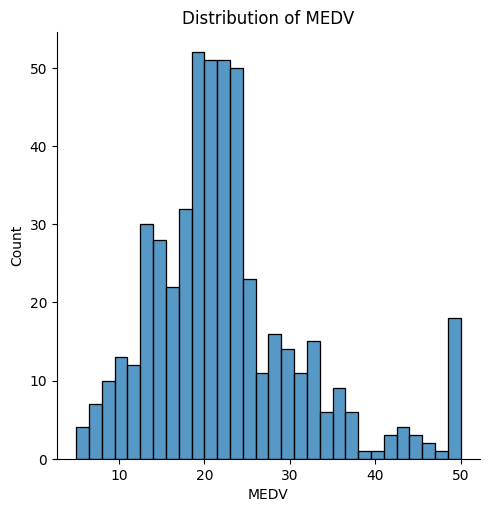

In [20]:
sns.displot(df['MEDV'], bins=30)
plt.title('Distribution of MEDV')
plt.show()

###5. Scatter Plot: Creates a scatter plot for the average number of rooms per dwelling and the median value of homes.

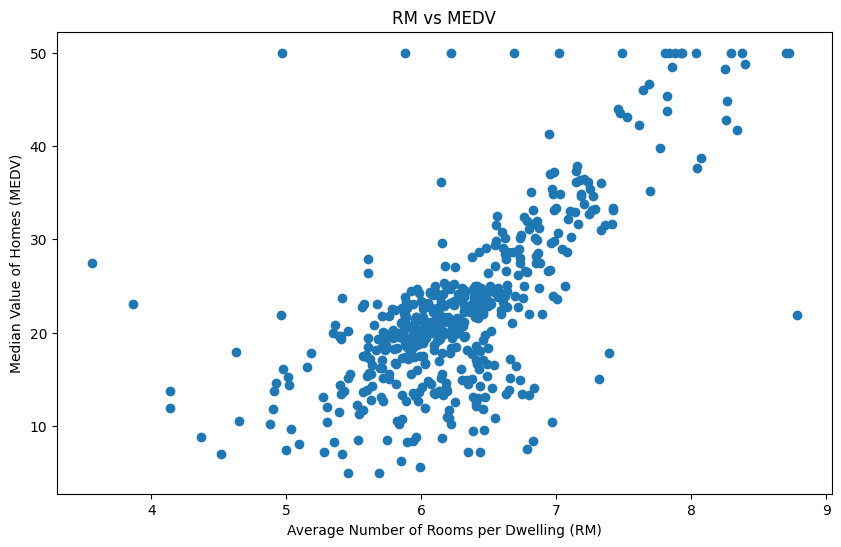

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('RM vs MEDV')
plt.show()

#4. Model Training and Evaluation

In [22]:
X = df.drop('MEDV', axis = 1)
print("X Shape= ", X.shape)
Y = df['MEDV']
print('Y shape= ', Y.shape)

X Shape=  (506, 13)
Y shape=  (506,)


###1. Splitting Data: Splits the data into training and testing sets.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X train Shape", X_train.shape)
print("X test Shape", X_test.shape)
print("Y train Shape", y_train.shape)
print("Y test Shape", y_test.shape)

X train Shape (404, 13)
X test Shape (102, 13)
Y train Shape (404,)
Y test Shape (102,)


##2. Training Model: Trains a linear regression model on the training data.

In [25]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###3. Making Predictions: Makes predictions on the testing data.

In [26]:
# Make predictions
y_pred = model.predict(X_test)

###4. Model Evaluation Metrics: Calculates the mean squared error, R-squared score, and mean absolute error for the model.

In [27]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [28]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [29]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [30]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326
Mean Absolute Error: 3.189091965887837


#5. Predicting House Prices

###1. Function to Predict House Price: Defines a function to predict the house price given input features.

In [31]:
# Function to predict house price given input features
def predict_house_price(features):
    # Convert input features to DataFrame
    features_df = pd.DataFrame([features], columns=X.columns)

    # Predict the price using the trained model
    predicted_price = model.predict(features_df)[0]
    return predicted_price

###2. Example Usage: Uses the function to predict the house price for a set of example features.

In [32]:
# Example usage of the function
example_features = {
    'CRIM': 0.1,
    'ZN': 18.0,
    'INDUS': 2.31,
    'CHAS': 0,
    'NOX': 0.538,
    'RM': 6.575,
    'AGE': 65.2,
    'DIS': 4.09,
    'RAD': 1,
    'TAX': 296,
    'PTRATIO': 15.3,
    'B': 396.9,
    'LSTAT': 4.98
}

In [33]:
predicted_price = predict_house_price(example_features)
print("\n" + "="*70)
print("          Predicted House Price")
print("="*70)
print(f"The predicted price for the house with the given features is: ${predicted_price:,.2f}")
print("="*70 + "\n")


          Predicted House Price
The predicted price for the house with the given features is: $29.94



###3. Multiple Examples: Predicts house prices for multiple sets of features.
###4. Saving Results: Saves the predicted house prices to a CSV file.

In [34]:
# Create multiple examples of house features
example_features_list = [
    {'CRIM': 0.1, 'ZN': 18.0, 'INDUS': 2.31, 'CHAS': 0, 'NOX': 0.538, 'RM': 6.575, 'AGE': 65.2, 'DIS': 4.09, 'RAD': 1, 'TAX': 296, 'PTRATIO': 15.3, 'B': 396.9, 'LSTAT': 4.98},
    {'CRIM': 0.2, 'ZN': 0.0, 'INDUS': 7.07, 'CHAS': 0, 'NOX': 0.469, 'RM': 6.421, 'AGE': 78.9, 'DIS': 4.9671, 'RAD': 2, 'TAX': 242, 'PTRATIO': 17.8, 'B': 396.9, 'LSTAT': 9.14},
    {'CRIM': 0.3, 'ZN': 0.0, 'INDUS': 7.87, 'CHAS': 0, 'NOX': 0.524, 'RM': 6.998, 'AGE': 45.8, 'DIS': 6.0622, 'RAD': 3, 'TAX': 222, 'PTRATIO': 18.7, 'B': 394.63, 'LSTAT': 2.94},
    {'CRIM': 0.4, 'ZN': 0.0, 'INDUS': 8.14, 'CHAS': 0, 'NOX': 0.538, 'RM': 7.147, 'AGE': 54.2, 'DIS': 6.0622, 'RAD': 4, 'TAX': 307, 'PTRATIO': 21.0, 'B': 380.02, 'LSTAT': 5.33},
    {'CRIM': 0.5, 'ZN': 0.0, 'INDUS': 5.96, 'CHAS': 0, 'NOX': 0.499, 'RM': 5.933, 'AGE': 68.2, 'DIS': 3.0913, 'RAD': 5, 'TAX': 279, 'PTRATIO': 19.2, 'B': 396.9, 'LSTAT': 7.67}
]

# Predict prices for each set of features
results = []
for features in example_features_list:
    predicted_price = predict_house_price(features)
    features['Predicted_Price'] = predicted_price
    results.append(features)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('predicted_house_prices.csv', index=False)

print(results_df)

   CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0   0.1  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1   0.2   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2   0.3   0.0   7.87     0  0.524  6.998  45.8  6.0622    3  222     18.7   
3   0.4   0.0   8.14     0  0.538  7.147  54.2  6.0622    4  307     21.0   
4   0.5   0.0   5.96     0  0.499  5.933  68.2  3.0913    5  279     19.2   

        B  LSTAT  Predicted_Price  
0  396.90   4.98        29.942805  
1  396.90   9.14        25.162000  
2  394.63   2.94        28.197475  
3  380.02   5.33        24.420697  
4  396.90   7.67        25.043627  


#6. Output

###Predicted House Prices: Displays the predicted house prices for the multiple sets of features.

#7. Summary

###This code demonstrates a linear regression model to predict house prices based on various features. It loads the Boston housing dataset, preprocesses the data, visualizes the relationships between features, trains a linear regression model, and evaluates its performance. The model is then used to predict house prices for multiple sets of features.